In [1]:
import tensorflow as tf
import numpy as np

# Quickstart

In [16]:
# https://www.tensorflow.org/tutorials/quickstart/beginner

In [4]:
# load mnist dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
# convert from integer to floating point
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
# create a sequential model (MLP)
# Sequential groups a linear stack of layers into a tf.keras.Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # flatten the input into 1-D
    tf.keras.layers.Dense(128, activation='relu'), # regular fully-connected layer
    tf.keras.layers.Dropout(0.2), # dropout layer, setting input units to 0 with a frequency of rate
    tf.keras.layers.Dense(10) # regular fully-connected layer. default activation is no activation
])

In [7]:
# predictions with randomly initialized weights
predictions = model(x_train[:1]).numpy()
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[ 0.39766353, -0.08835667,  1.1138604 , -0.20140848,  0.43693435,
         0.9213433 ,  0.2317308 , -0.1305928 , -0.23675317, -0.10951892]],
      dtype=float32)

In [8]:
# softmax converts these logits to "probabilities" for each class
tf.nn.softmax(predictions).numpy()

array([[0.10516933, 0.06468643, 0.2152432 , 0.05777174, 0.10938159,
        0.17754987, 0.08908928, 0.06201122, 0.05576548, 0.06333191]],
      dtype=float32)

In [9]:
# this loss is equal to the negative log probability of the true class.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# as the weights are randomly initialized, the initial loss should be close to -tf.log(1/10)=2.3
loss_fn(y_train[:1], predictions).numpy()

1.7285037

In [10]:
model.compile(optimizer='adam', # adam method as iterative update. CMU 11-785, L7
              loss=loss_fn, 
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=5) # training with 5 epochs

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3013 - accuracy: 0.9128
Epoch 2/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1437 - accuracy: 0.9569
Epoch 3/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1106 - accuracy: 0.9668
Epoch 4/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0907 - accuracy: 0.9715
Epoch 5/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0779 - accuracy: 0.9751


In [12]:
model.evaluate(x_test, y_test, verbose=2)

10000/10000 - 0s - loss: 0.0782 - accuracy: 0.9760


[0.07824939721073024, 0.976]

In [14]:
# add a softmax layer
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [15]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[4.0722631e-07, 8.0131155e-09, 2.6225230e-06, 3.0007391e-04,
        3.0527074e-11, 1.7148874e-06, 1.4954973e-12, 9.9959856e-01,
        1.3707400e-07, 9.6658849e-05],
       [5.4369912e-07, 1.0880732e-04, 9.9988914e-01, 5.5839445e-07,
        2.7062792e-15, 8.5470975e-07, 7.3613610e-10, 3.6062590e-11,
        3.5749188e-08, 2.6668329e-12],
       [6.3636492e-08, 9.9975306e-01, 3.5143526e-05, 5.2558144e-06,
        1.5342093e-05, 2.5490001e-06, 1.8049634e-05, 9.9342127e-05,
        6.9875387e-05, 1.2584385e-06],
       [9.9964833e-01, 5.4916587e-09, 2.6757485e-04, 5.3140175e-06,
        9.7841155e-07, 7.9166475e-06, 4.2170992e-05, 6.8572813e-06,
        1.5888881e-08, 2.0828269e-05],
       [1.0952320e-05, 1.6109102e-08, 1.0160403e-05, 1.4162734e-07,
        9.9733573e-01, 1.4145382e-06, 8.4824831e-05, 5.1777173e-05,
        7.9710333e-07, 2.5040742e-03]], dtype=float32)>

# ML Basics with Keras

## Basic Image classification

In [17]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [18]:
# load data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [20]:
train_images.shape

(60000, 28, 28)

In [21]:
len(train_labels)

60000

In [22]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [23]:
test_images.shape, len(test_labels)

((10000, 28, 28), 10000)

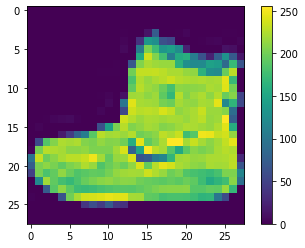

In [24]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [25]:
train_images, test_images = train_images / 255.0, test_images / 255.0

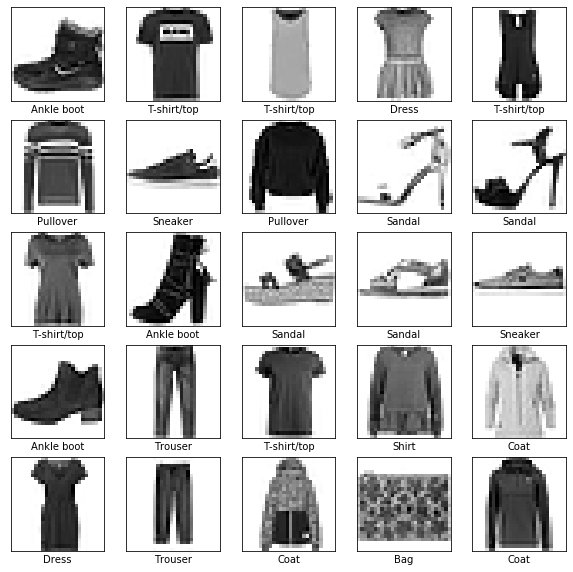

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(28, activation='relu'),
    keras.layers.Dense(10)
])

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.5732 - accuracy: 0.8042
Epoch 2/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.4209 - accuracy: 0.8517
Epoch 3/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3903 - accuracy: 0.8634
Epoch 4/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3707 - accuracy: 0.8686
Epoch 5/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3560 - accuracy: 0.8733
Epoch 6/10
60000/60000 [==============================] - 2s 25us/sample - loss: 0.3445 - accuracy: 0.8759
Epoch 7/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3355 - accuracy: 0.8801
Epoch 8/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3296 - accuracy: 0.8805
Epoch 9/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3227 - accuracy: 0.8834
Epoch 10/10
60

In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

10000/10000 - 0s - loss: 0.3873 - accuracy: 0.8617

Test accuracy: 0.8617


In [31]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [32]:
predictions = probability_model.predict(test_images)

In [33]:
predictions[0]

array([2.1592050e-06, 6.6456329e-10, 9.6305585e-06, 6.0217722e-06,
       3.3860647e-06, 5.5157193e-03, 6.3221385e-05, 6.9396593e-02,
       1.2508462e-03, 9.2375243e-01], dtype=float32)

In [34]:
np.argmax(predictions[0]) == test_labels[0]

True

In [37]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} : {:2.0f}% ({})".format(class_names[predicted_label],
                                          100*np.max(predictions_array),
                                          class_names[true_label]),
              color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

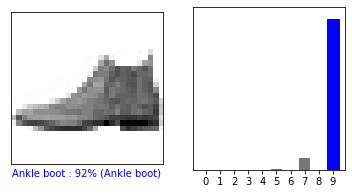

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

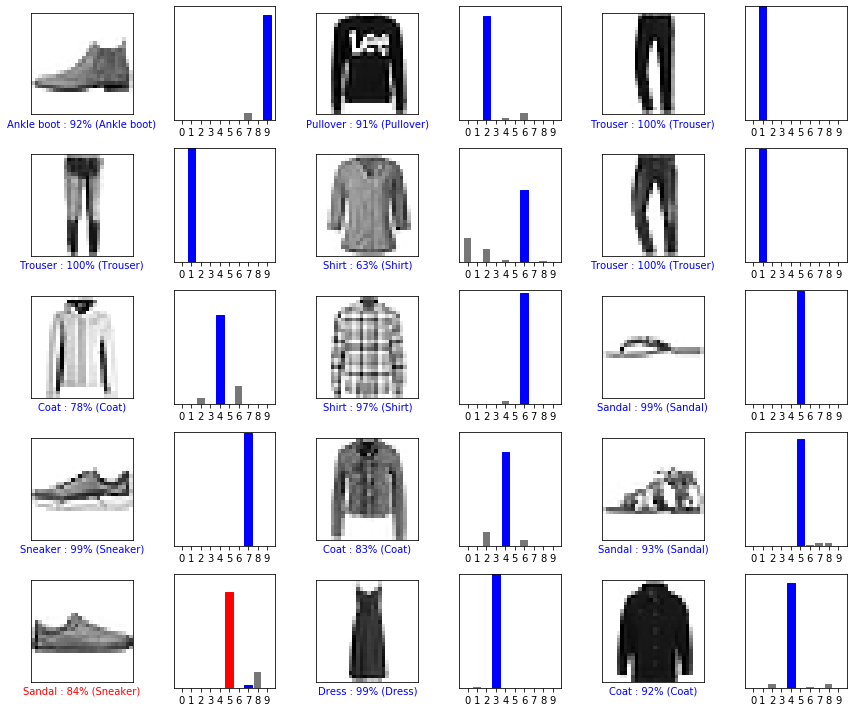

In [39]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [43]:
img = test_images[1]
print(img.shape)

(28, 28)


In [44]:
# tf.keras models are optimized to make predictions on a batch or collection
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [45]:
predictions_single = probability_model.predict(img)

In [47]:
print(predictions_single)

[[5.2000996e-05 6.0440564e-10 9.1239887e-01 1.3006988e-06 2.5150191e-02
  1.2205115e-13 6.2387813e-02 7.8326839e-21 9.9017607e-06 1.0127874e-17]]


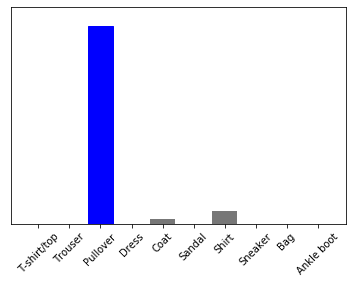

In [48]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [49]:
np.argmax(predictions_single[0])

2

## Test classification with TF Hub

In [50]:
import numpy as np
import tensorflow as tf

!pip install -q tensorflow-hub
!pip install -q tfds-nightly
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [51]:
print("TF version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is ", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF version:  2.1.0
Eager mode:  True
Hub version:  0.8.0
GPU is  NOT AVAILABLE


In [52]:
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews",
    split=("train[:60%]", "train[60%:]", "test"),
    as_supervised=True)

Shuffling and writing examples to /Users/levendlee/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete2HO6B1/imdb_reviews-train.tfrecord


Shuffling and writing examples to /Users/levendlee/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete2HO6B1/imdb_reviews-test.tfrecord


Shuffling and writing examples to /Users/levendlee/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete2HO6B1/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /Users/levendlee/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [53]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [54]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

In [55]:
# Use a pre-trained text embedding model from Tensorflow Hub
# google/tf2-preview/gnews-swivel-20dim/1
# Token based text embedding trained on English Google News 130GB corpus.
# https://arxiv.org/abs/1602.02215
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064]],
      dtype=float32)>

In [56]:
model = tf.keras.Sequential()
model.add(hub_layer) # pre-trained saved model to map a sentence into its embedding vector
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [58]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 2s 74ms/step - loss: 0.6860 - accuracy: 0.5703 - val_loss: 0.6447 - val_accuracy: 0.6271
Epoch 2/20
30/30 [==============================] - 2s 54ms/step - loss: 0.6257 - accuracy: 0.6211 - val_loss: 0.6165 - val_accuracy: 0.6249
Epoch 3/20
30/30 [==============================] - 2s 55ms/step - loss: 0.6011 - accuracy: 0.6463 - val_loss: 0.5890 - val_accuracy: 0.6589
Epoch 4/20
30/30 [==============================] - 2s 57ms/step - loss: 0.5677 - accuracy: 0.6787 - val_loss: 0.5551 - val_accuracy: 0.6931
Epoch 5/20
30/30 [==============================] - 2s 57ms/step - loss: 0.5278 - accuracy: 0.7153 - val_loss: 0.5220 - val_accuracy: 0.7138
Epoch 6/20
30/30 [==============================] - 2s 57ms/step - loss: 0.4895 - accuracy: 0.7493 - val_loss: 0.4880 - val_accuracy: 0.7624
Epoch 7/20
30/30 [==============================] - 2s 56ms/step - loss: 0.4517 - accuracy: 0.7815 - val_loss: 0.4580 - val_accuracy: 0.7609
Epoch 8/20
30

In [60]:
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
    print("%s: %.3f" % (name, value))

loss: 0.326
accuracy: 0.853


## Text classification with preprocessed test: Movie reviews

In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import numpy as np

In [3]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k',
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    as_supervised=True,
    with_info=True
)

Shuffling and writing examples to /Users/levendlee/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete6YMTWE/imdb_reviews-train.tfrecord
Shuffling and writing examples to /Users/levendlee/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete6YMTWE/imdb_reviews-test.tfrecord
Shuffling and writing examples to /Users/levendlee/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete6YMTWE/imdb_reviews-unsupervised.tfrecord
Dataset imdb_reviews downloaded and prepared to /Users/levendlee/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
encoder = info.features['text'].encoder

In [5]:
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [6]:
sample_string = "Hello Tensorflow"
encoded_string = encoder.encode(sample_string)
print("Encoded string is {}".format(encoded_string))

original_string = encoder.decode(encoded_string)
print("The original string: {}".format(original_string))

assert original_string == sample_string

Encoded string is [4025, 222, 6307, 2327, 2934]
The original string: Hello Tensorflow


In [7]:
for ts in encoded_string:
    print("{} --> {}".format(ts, encoder.decode([ts])))

4025 --> Hell
222 --> o 
6307 --> Ten
2327 --> sor
2934 --> flow


In [8]:
for train_example, train_label in train_data.take(1):
    print("Encoded text:", train_example[:10].numpy())
    print("Label:", train_label.numpy())

Encoded text: [  62   18   41  604  927   65    3  644 7968   21]
Label: 0


In [9]:
encoder.decode(train_example)

"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [34]:
BUFFER_SIZE = 1000

train_batches = (train_data.shuffle(BUFFER_SIZE).padded_batch(32, ((None,), tuple())))
test_batches = test_data.padded_batch(32, ((None,), tuple()))

In [35]:
for example_batch, label_batch in train_batches.take(2):
    print("Batch shape:", example_batch.shape)
    print("Label shape:", label_batch.shape)

Batch shape: (32, 1231)
Label shape: (32,)
Batch shape: (32, 1227)
Label shape: (32,)


In [36]:
model = keras.Sequential([
    keras.layers.Embedding(encoder.vocab_size, 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='adam',
             loss=tf.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [39]:
history = model.fit(train_batches,
                   epochs=10,
                   validation_data=test_batches,
                   validation_steps=30)

Epoch 1/10
782/782 [==============================] - 4s 5ms/step - loss: 0.6821 - accuracy: 0.5004 - val_loss: 0.6640 - val_accuracy: 0.5021
Epoch 2/10
782/782 [==============================] - 2s 3ms/step - loss: 0.6203 - accuracy: 0.5539 - val_loss: 0.5943 - val_accuracy: 0.6083
Epoch 3/10
782/782 [==============================] - 2s 3ms/step - loss: 0.5403 - accuracy: 0.6687 - val_loss: 0.5311 - val_accuracy: 0.7281
Epoch 4/10
782/782 [==============================] - 2s 3ms/step - loss: 0.4730 - accuracy: 0.7522 - val_loss: 0.4812 - val_accuracy: 0.7427
Epoch 5/10
782/782 [==============================] - 2s 3ms/step - loss: 0.4204 - accuracy: 0.8026 - val_loss: 0.4427 - val_accuracy: 0.7969
Epoch 6/10
782/782 [==============================] - 3s 3ms/step - loss: 0.3782 - accuracy: 0.8347 - val_loss: 0.4154 - val_accuracy: 0.8333
Epoch 7/10
782/782 [==============================] - 3s 3ms/step - loss: 0.3483 - accuracy: 0.8529 - val_loss: 0.3955 - val_accuracy: 0.8406
Epoch 

In [40]:
loss, accuracy = model.evaluate(test_batches)

    782/Unknown - 2s 3ms/step - loss: 0.3315 - accuracy: 0.8578

In [41]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

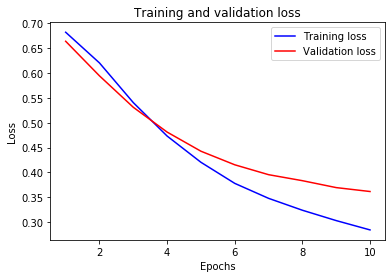

In [42]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

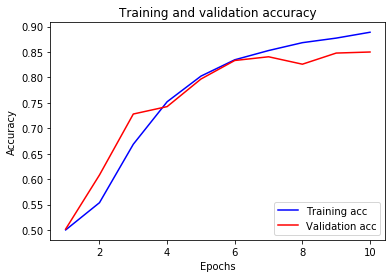

In [43]:
plt.clf()

plt.plot(epochs, acc, 'b', label="Training acc")
plt.plot(epochs, val_acc, 'r', label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

plt.show()

# Regression

In [45]:
!pip install -q seaborn
!pip install -q git+https://github.com/tensorflow/docs

In [46]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [47]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.1.0


In [48]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [49]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 2us/step


'/Users/levendlee/.keras/datasets/auto-mpg.data'

In [50]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [51]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [52]:
dataset = dataset.dropna()

In [53]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [54]:
# convert categorical variables into dummy/indicator variables
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [55]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

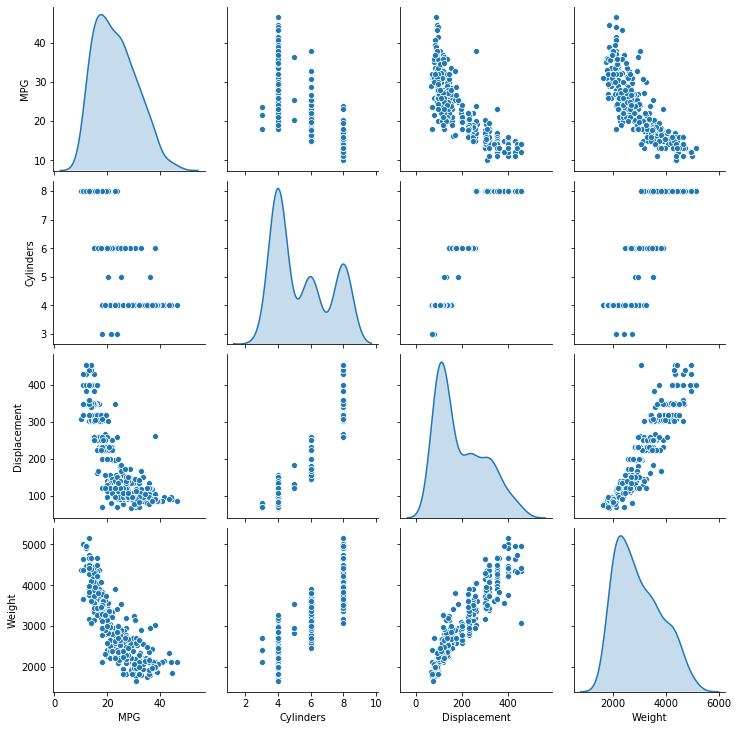

In [56]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [58]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [59]:
train_labels = train_dataset.pop("MPG")
test_labels = test_dataset.pop("MPG")

In [60]:
type(train_dataset)

pandas.core.frame.DataFrame

In [61]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [64]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=["mae", "mse"])
    
    return model

In [65]:
model = build_model()

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Random parameters
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.19656123],
       [ 0.1229024 ],
       [-0.37321544],
       [ 0.3157431 ],
       [ 0.59645855],
       [-0.06702364],
       [ 0.66149116],
       [ 0.2746503 ],
       [-0.14912674],
       [ 0.5271882 ]], dtype=float32)

In [70]:
EPOCHS=1000

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split=0.2, verbose=0,
    callbacks=[tfdocs.modeling.EpochDots()]
)


Epoch: 0, loss:5.7440,  mae:1.6882,  mse:5.7440,  val_loss:7.9252,  val_mae:2.1418,  val_mse:7.9252,  
....................................................................................................
Epoch: 100, loss:5.2130,  mae:1.5751,  mse:5.2130,  val_loss:8.0403,  val_mae:2.2378,  val_mse:8.0403,  
....................................................................................................
Epoch: 200, loss:4.4621,  mae:1.4702,  mse:4.4621,  val_loss:7.9624,  val_mae:2.1487,  val_mse:7.9624,  
....................................................................................................
Epoch: 300, loss:4.0506,  mae:1.3729,  mse:4.0506,  val_loss:8.5439,  val_mae:2.2347,  val_mse:8.5439,  
....................................................................................................
Epoch: 400, loss:3.6322,  mae:1.3003,  mse:3.6322,  val_loss:8.7561,  val_mae:2.2550,  val_mse:8.7561,  
........................................................................

In [72]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.192197,1.019191,2.192197,9.025151,2.371888,9.025151,995
996,2.105361,0.959529,2.105361,10.335900,2.543907,10.335900,996
997,2.130621,0.958043,2.130621,9.520266,2.466927,9.520267,997
998,2.188961,0.964878,2.188961,9.268132,2.389815,9.268132,998
999,2.234263,0.937905,2.234263,9.270177,2.395340,9.270178,999


In [73]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

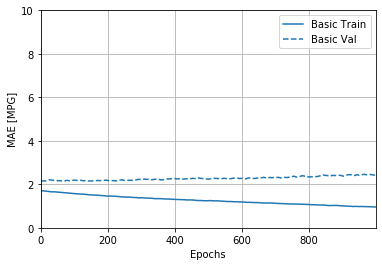

In [74]:
plotter.plot({"Basic":history}, metric="mae")
plt.ylim([0,10])
plt.ylabel("MAE [MPG]")

In [75]:
hist.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,5.744043,1.688162,5.744043,7.925249,2.141767,7.925249,0
1,6.111794,1.728631,6.111794,8.137748,2.140286,8.137748,1
2,5.900248,1.728885,5.900248,7.927488,2.148403,7.927488,2
3,5.674044,1.666303,5.674044,8.277759,2.187269,8.277760,3
4,5.994752,1.709385,5.994752,8.107254,2.136895,8.107254,4


In [76]:
# prevent overfitting with EarlyStopping callback
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

early_history = model.fit(normed_train_data, train_labels,
                         epochs=EPOCHS, validation_split=0.2, verbose=0,
                         callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:2.2265,  mae:0.9618,  mse:2.2265,  val_loss:9.6960,  val_mae:2.4560,  val_mse:9.6960,  
...................

Text(0, 0.5, 'MAE [MPG]')

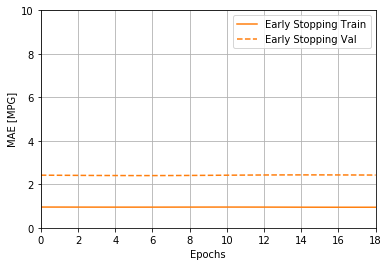

In [77]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [78]:
# MAE: Mean Absolute Error
# MSE: Mean Square Error
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

78/78 - 0s - loss: 7.6118 - mae: 2.2620 - mse: 7.6118


In [79]:
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  2.26 MPG


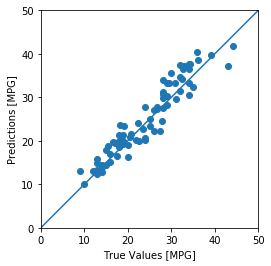

In [80]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect="equal")
plt.scatter(test_labels, test_predictions)
plt.xlabel("True Values [MPG]")
plt.ylabel("Predictions [MPG]")
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)

_ = plt.plot(lims, lims)

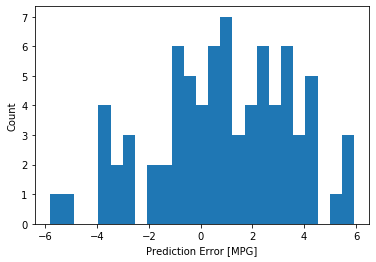

In [81]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

# Overfit and underfit

In [83]:
import tensorflow as tf

from tensorflow.keras import layers, regularizers

print(tf.__version__)

2.1.0


In [84]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [85]:
from IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile

In [86]:
logdir = pathlib.Path(tempfile.mkdtemp()) / "tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

In [87]:
gz = tf.keras.utils.get_file('HIGGS.csv.gz', 'http://mlphysics.ics.uci.edu/data/higgs/HIGGS.csv.gz')

2816409600/2816407858 [==============================] - 228s 0us/step


In [88]:
FEATURES = 28

In [89]:
ds = tf.data.experimental.CsvDataset(gz, [float(),]*(FEATURES+1), compression_type="GZIP")

In [90]:
def pack_row(*row):
    label = row[0]
    features = tf.stack(row[1:], 1) # add bias
    return features, label

In [91]:
packed_ds = ds.batch(10000).map(pack_row).unbatch()

tf.Tensor(
[ 0.8692932  -0.6350818   0.22569026  0.32747006 -0.6899932   0.75420225
 -0.24857314 -1.0920639   0.          1.3749921  -0.6536742   0.9303491
  1.1074361   1.1389043  -1.5781983  -1.0469854   0.          0.65792954
 -0.01045457 -0.04576717  3.1019614   1.35376     0.9795631   0.97807616
  0.92000484  0.72165745  0.98875093  0.87667835], shape=(28,), dtype=float32)


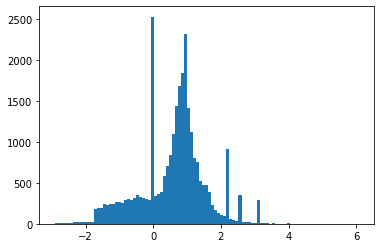

In [92]:
for features, label in packed_ds.batch(1000).take(1):
    print(features[0])
    plt.hist(features.numpy().flatten(), bins=101)

In [93]:
N_VALIDATION = int(1e3)
N_TRAIN = int(1e4)
BUFFER_SIZE = int(1e4)
BATCH_SIZE = 500
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

In [95]:
# Dataset.skip and Dataset.take
# Dataset.cache ensures that the loader doesn't need to re-read the data from the file on each epoch
validate_ds = packed_ds.take(N_VALIDATION).cache()
train_ds = packed_ds.skip(N_VALIDATION).take(N_TRAIN).cache()

In [96]:
train_ds

<CacheDataset shapes: ((28,), ()), types: (tf.float32, tf.float32)>

In [97]:
validate_ds = validate_ds.batch(BATCH_SIZE)
# repeat is doing nothing here
train_ds = train_ds.shuffle(BUFFER_SIZE).repeat().batch(BATCH_SIZE)

In [100]:
# A LearningRateSchedule that uses an inverse time decay schedule.
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.001,
    decay_steps=STEPS_PER_EPOCH*1000,
    decay_rate=1,
    staircase=False
)

def get_optimizer():
    return tf.keras.optimizers.Adam(learning_rate=lr_schedule)

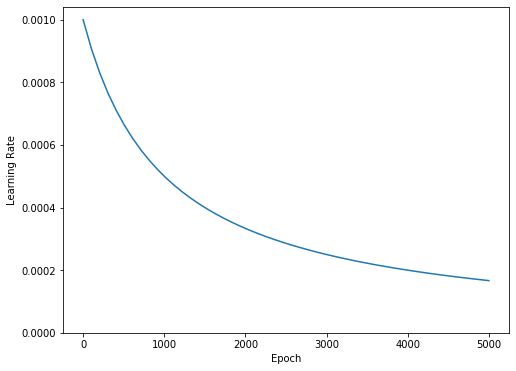

In [101]:
step = np.linspace(0, int(1e5))
lr = lr_schedule(step)
plt.figure(figsize=(8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0, max(plt.ylim())])
plt.xlabel("Epoch")
_ = plt.ylabel("Learning Rate")

In [111]:
def get_callbacks(name):
    return [
        tfdocs.modeling.EpochDots(), # print a dot for each epoch
        tf.keras.callbacks.EarlyStopping(monitor="val_binary_crossentropy", patience=200),
        tf.keras.callbacks.TensorBoard(logdir/name) # generate TensorBoard logs
    ]

In [112]:
def compile_and_fit(model, name, optimizer=None, max_epochs=10000):
    if optimizer is None:
        optimizer = get_optimizer()
    model.compile(optimizer=optimizer,
                 loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                 metrics=[tf.keras.losses.BinaryCrossentropy(
                 from_logits=True, name="binary_crossentropy"),
                 "accuracy"])
    model.summary()
    
    history = model.fit(
        train_ds,
        steps_per_epoch = STEPS_PER_EPOCH,
        epochs=max_epochs,
        validation_data=validate_ds,
        callbacks=get_callbacks(name),
        verbose=0
    )
    
    return history

## Tiny Model

In [113]:
tiny_model = tf.keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(FEATURES,)),
    layers.Dense(1)
])

In [114]:
size_histories = {}
size_histories['Tiny'] = compile_and_fit(tiny_model, "sizes/Tiny")

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                464       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4832,  binary_crossentropy:0.8307,  loss:0.8307,  val_accuracy:0.4950,  val_binary_crossentropy:0.7824,  val_loss:0.7824,  
....................................................................................................
Epoch: 100, accuracy:0.6131,  binary_crossentropy:0.6178,  loss:0.6178,  val_accuracy:0.5760,  val_binary_crossentropy:0.6265,  val_loss:0.6265,  
....................................................................................................
Epoch: 200, accuracy:0.

(0.5, 0.7)

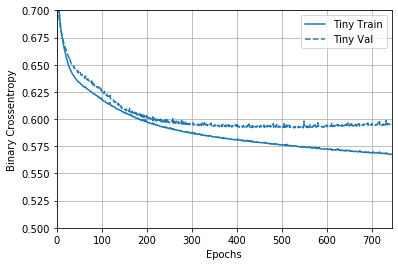

In [116]:
plotter = tfdocs.plots.HistoryPlotter(metric="binary_crossentropy")
plotter.plot(size_histories)
plt.ylim([0.5, 0.7])

## Small Model

In [117]:
small_model = tf.keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(FEATURES,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

In [118]:
size_histories['Small'] = compile_and_fit(small_model, 'sizes/Small')

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                464       
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.5042,  binary_crossentropy:0.7267,  loss:0.7267,  val_accuracy:0.4750,  val_binary_crossentropy:0.7042,  val_loss:0.7042,  
....................................................................................................
Epoch: 100, accuracy:0.6364,  binary_crossentropy:0.6029,  loss:0.6029,  val_accuracy:0.6210,  val_binary_crossentropy:0.6248,  val_loss:0.

## Medium Model

In [119]:
medium_model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(FEATURES,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [121]:
size_histories['Medium'] = compile_and_fit(medium_model, 'sizes/Medium')

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                1856      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 65        
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4763,  binary_crossentropy:0.6952,  loss:0.6952,  val_accuracy:0.4590,  val_binary_crossentropy:0.6870,  val_loss:0.6870,  
....................................................................................................
E

## Large Model

In [122]:
large_model = tf.keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(FEATURES,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])

In [123]:
size_histories['Large'] = compile_and_fit(large_model, 'sizes/Large')

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               14848     
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_24 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 513       
Total params: 540,673
Trainable params: 540,673
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4841,  binary_crossentropy:0.6905,  loss:0.6905,  val_accuracy:0.5070,  val_binary_crossentropy:0.6700,  val_loss:0.6700,  
....................................................................................................

Text(0.5, 0, 'Epochs [Log Scale]')

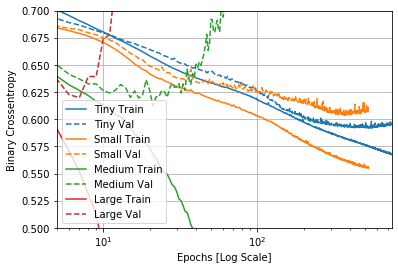

In [124]:
plotter.plot(size_histories)
a = plt.xscale("log")
plt.xlim([5, max(plt.xlim())])
plt.ylim([0.5, 0.7])
plt.xlabel("Epochs [Log Scale]")

In [125]:
%tensorboard --logdir {logdir}/sizes

UsageError: Line magic function `%tensorboard` not found.


In [128]:
shutil.rmtree(logdir/'regularizers/Tiny', ignore_errors=True)
shutil.copytree(logdir/'sizes/Tiny', logdir/'regularizers/Tiny')

PosixPath('/var/folders/6r/zz9ny_rs1bx_wp4c9q41dnm40000gn/T/tmpl9rbjebi/tensorboard_logs/regularizers/Tiny')

In [129]:
regularizer_histories = {}
regularizer_histories['Tiny'] = size_histories['Tiny']

## Add weight regularization

In [135]:
l2_regularizer = regularizers.l2(0.001)

l2_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu', 
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(FEATURES,)),
    layers.Dense(512, activation='elu',
                kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)
])

regularizer_histories['l2'] = compile_and_fit(l2_model, "regularizers/l2")

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 512)               14848     
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_36 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 513       
Total params: 540,673
Trainable params: 540,673
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.5029,  binary_crossentropy:0.8279,  loss:1.8617,  val_accuracy:0.5510,  val_binary_crossentropy:0.7000,  val_loss:1.6859,  
...................................................................................................

(0.5, 0.7)

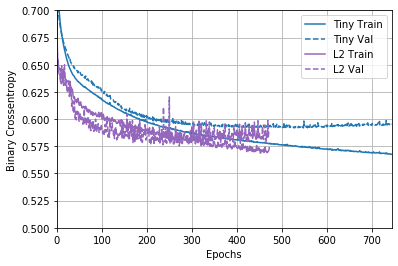

In [136]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

In [137]:
result = l2_model(features)
regularization_loss = tf.add_n(l2_model.losses)

In [138]:
regularization_loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.0192475>

## Add dropout

In [139]:
dropout_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu', input_shape=(FEATURES,)),
    layers.Dropout(0.3),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.3),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

regularizer_histories['dropout'] = compile_and_fit(dropout_model, "regularizers/dropout")

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 512)               14848     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)               

(0.5, 0.7)

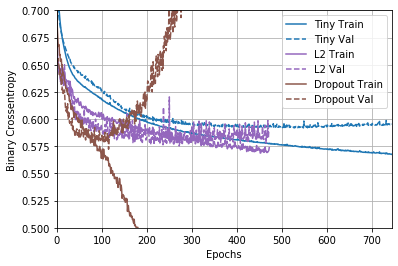

In [140]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

## Combined L2 + dropout

In [145]:
combined_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu', 
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(FEATURES,)),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu',
                kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu',
                kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1)
])

In [146]:
regularizer_histories['combined'] = compile_and_fit(combined_model, "regularizers/combined")

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 512)               14848     
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 1)               

(0.5, 0.7)

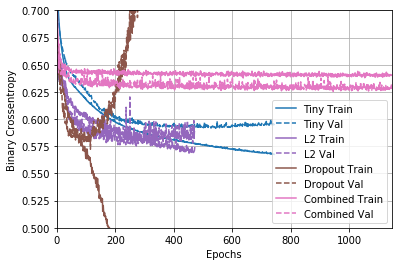

In [147]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

# Save and load models

In [1]:
!pip install -q pyyaml h5py

In [2]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.1.0


In [3]:
(train_images, train_labels), (test_images, test_labels) = \
    tf.keras.datasets.mnist.load_data()

In [4]:
train_labels, test_labels = train_labels[:1000], test_labels[:1000]

def process(images):
    return images[:1000].reshape(-1, 28*28) / 255.0
train_images, test_images = process(train_images), process(test_images)

In [6]:
def create_model():
    model = tf.keras.models.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10)
    ])
    
    model.compile(optimizer='adam',
                  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

model = create_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [7]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [8]:
model.fit(train_images, train_labels, epochs=10,
          validation_data=(test_images, test_labels),
          callbacks=[cp_callback])

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 544/1000 [===============>..............] - ETA: 0s - loss: 1.5699 - accuracy: 0.5202 
Epoch 00001: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 1s 573us/sample - loss: 1.1856 - accuracy: 0.6550 - val_loss: 0.7324 - val_accuracy: 0.7850
Epoch 2/10
 544/1000 [===============>..............] - ETA: 0s - loss: 0.4282 - accuracy: 0.8713
Epoch 00002: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 160us/sample - loss: 0.4271 - accuracy: 0.8710 - val_loss: 0.5660 - val_accuracy: 0.8210
Epoch 3/10
 544/1000 [===============>..............] - ETA: 0s - loss: 0.2774 - accuracy: 0.9228
Epoch 00003: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 158us/sample - loss: 0.2717 - accuracy: 0.9300 - val_loss: 0.4794 - val_accuracy: 0.8560
Epoch 4/10
 576/1000 [================>.............] - ETA: 0s - loss: 0.2217 - accuracy: 0.9514
Epoc

In [11]:
! ls training_1

checkpoint                  cp.ckpt.index
cp.ckpt.data-00000-of-00001


In [12]:
model = create_model()

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

1000/1000 - 0s - loss: 2.3555 - accuracy: 0.0850
Untrained model, accuracy:  8.50%


In [13]:
model.load_weights(checkpoint_path)

In [15]:
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

1000/1000 - 0s - loss: 0.4142 - accuracy: 0.8750
Restored model, accuracy: 87.50%


In [17]:
# use str.format
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path,
    verbose = 1,
    save_weights_only = True,
    period = 5
)

model = create_model()
model.save_weights(checkpoint_path.format(epoch=0))

model.fit(train_images,
          train_labels,
          epochs=50,
          callbacks=[cp_callback],
          validation_data=(test_images,test_labels),
          verbose=0)


Epoch 00005: saving model to training_2/cp-0005.ckpt

Epoch 00010: saving model to training_2/cp-0010.ckpt

Epoch 00015: saving model to training_2/cp-0015.ckpt

Epoch 00020: saving model to training_2/cp-0020.ckpt

Epoch 00025: saving model to training_2/cp-0025.ckpt

Epoch 00030: saving model to training_2/cp-0030.ckpt

Epoch 00035: saving model to training_2/cp-0035.ckpt

Epoch 00040: saving model to training_2/cp-0040.ckpt

Epoch 00045: saving model to training_2/cp-0045.ckpt

Epoch 00050: saving model to training_2/cp-0050.ckpt


In [18]:
! ls training_2/

checkpoint                       cp-0025.ckpt.index
cp-0000.ckpt.data-00000-of-00001 cp-0030.ckpt.data-00000-of-00001
cp-0000.ckpt.index               cp-0030.ckpt.index
cp-0005.ckpt.data-00000-of-00001 cp-0035.ckpt.data-00000-of-00001
cp-0005.ckpt.index               cp-0035.ckpt.index
cp-0010.ckpt.data-00000-of-00001 cp-0040.ckpt.data-00000-of-00001
cp-0010.ckpt.index               cp-0040.ckpt.index
cp-0015.ckpt.data-00000-of-00001 cp-0045.ckpt.data-00000-of-00001
cp-0015.ckpt.index               cp-0045.ckpt.index
cp-0020.ckpt.data-00000-of-00001 cp-0050.ckpt.data-00000-of-00001
cp-0020.ckpt.index               cp-0050.ckpt.index
cp-0025.ckpt.data-00000-of-00001


In [19]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_2/cp-0050.ckpt'

In [20]:
model = create_model()

model.load_weights(latest)

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

1000/1000 - 0s - loss: 0.4695 - accuracy: 0.8780
Restored model, accuracy: 87.80%


In [21]:
# checkpoint format
model.save_weights("./checkpoints/my_checkpoint")

model = create_model()

model.load_weights("./checkpoints/my_checkpoint")
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

1000/1000 - 0s - loss: 0.4695 - accuracy: 0.8780
Restored model, accuracy: 87.80%


## Save the entire model

In [22]:
# save model's architecture, weights, and training configuration
# the optimizer-state if recovered, resume training from where left off
model = create_model()
model.fit(train_images, train_labels, epochs=5)

!mkdir -p saved_model
model.save("saved_model/my_model")

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 311us/sample - loss: 1.2104 - accuracy: 0.6330
Epoch 2/5
1000/1000 [==============================] - 0s 106us/sample - loss: 0.4426 - accuracy: 0.8770
Epoch 3/5
1000/1000 [==============================] - 0s 96us/sample - loss: 0.2903 - accuracy: 0.9260
Epoch 4/5
1000/1000 [==============================] - 0s 83us/sample - loss: 0.2053 - accuracy: 0.9460
Epoch 5/5
1000/1000 [==============================] - 0s 85us/sample - loss: 0.1706 - accuracy: 0.9600
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [23]:
!ls saved_model

my_model


In [24]:
!ls saved_model/my_model

assets         saved_model.pb variables


### SaveModel format

In [25]:
new_model = tf.keras.models.load_model("saved_model/my_model")

In [27]:
new_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [28]:
id(model), id(new_model)

(26606998992, 26613124752)

In [29]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print("Restricted model, accuracy: {:5.2f}%".format(100*acc))
print(new_model.predict(test_images).shape)

1000/1000 - 0s - loss: 0.4403 - accuracy: 0.8640
Restricted model, accuracy: 86.40%
(1000, 10)


### HDF5 format

In [30]:
model = create_model()
model.fit(train_images, train_labels, epochs=5)

model.save("my_model.h5")

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 295us/sample - loss: 1.2107 - accuracy: 0.6640
Epoch 2/5
1000/1000 [==============================] - 0s 104us/sample - loss: 0.4453 - accuracy: 0.8700
Epoch 3/5
1000/1000 [==============================] - 0s 105us/sample - loss: 0.2765 - accuracy: 0.9370
Epoch 4/5
1000/1000 [==============================] - 0s 104us/sample - loss: 0.2154 - accuracy: 0.9440
Epoch 5/5
1000/1000 [==============================] - 0s 104us/sample - loss: 0.1498 - accuracy: 0.9770


In [31]:
!ls

checkpoints                saved_model
intro_to_tensor.ipynb      training_1
ml_basics_with_keras.ipynb training_2
my_model.h5


In [32]:
new_model = tf.keras.models.load_model("my_model.h5")
new_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [33]:
loss, acc = new_model.evaluate(test_images,  test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

1000/1000 - 0s - loss: 0.4283 - accuracy: 0.8590
Restored model, accuracy: 85.90%


# Tune hyperparameters with the Keras Tuner

In [34]:
import tensorflow as tf
from tensorflow import keras

import IPython

In [35]:
!pip install -q -U keras-tuner
import kerastuner as kt

In [36]:
(img_train, label_train), (img_test, label_test) = \
    keras.datasets.fashion_mnist.load_data()

In [37]:
def norm(img):
    return img.astype("float32") / 255.0

img_train, img_test = norm(img_train), norm(img_test)

## Define the model

In [41]:
# Hypermodel
# 1) use a model builder function
# 2) subclassing the HyperModel class of Keras Tuner API
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation="relu"))
    model.add(keras.layers.Dense(10))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-14])
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    return model

## Instantiate the tuner and perform hypertuning

In [42]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

In [43]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait=True)

In [44]:
tuner.search(img_train, label_train, epochs=10, 
             validation_data=(img_test, label_test),
             callbacks=[ClearTrainingOutput()])

best_hps = tuner.get_best_hyperparameters(nums_trails=1)[0]

INFO:tensorflow:Oracle triggered exit


TypeError: get_best_hyperparameters() got an unexpected keyword argument 'nums_trails'

In [47]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [48]:
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 416 and the optimal learning rate for the optimizer
is 0.001.



In [49]:
model = tuner.hypermodel.build(best_hps)
model.fit(img_train, label_train, epochs=10, validation_data=(img_test, label_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - ETA: 5:13 - loss: 2.3515 - accuracy: 0.06 - ETA: 19s - loss: 1.3486 - accuracy: 0.5521 - ETA: 12s - loss: 1.1017 - accuracy: 0.624 - ETA: 10s - loss: 0.9792 - accuracy: 0.655 - ETA: 8s - loss: 0.9269 - accuracy: 0.676 - ETA: 8s - loss: 0.8640 - accuracy: 0.69 - ETA: 7s - loss: 0.8160 - accuracy: 0.71 - ETA: 6s - loss: 0.7809 - accuracy: 0.72 - ETA: 6s - loss: 0.7591 - accuracy: 0.73 - ETA: 6s - loss: 0.7403 - accuracy: 0.74 - ETA: 5s - loss: 0.7261 - accuracy: 0.74 - ETA: 5s - loss: 0.7082 - accuracy: 0.75 - ETA: 5s - loss: 0.6908 - accuracy: 0.75 - ETA: 5s - loss: 0.6837 - accuracy: 0.76 - ETA: 5s - loss: 0.6697 - accuracy: 0.76 - ETA: 5s - loss: 0.6533 - accuracy: 0.77 - ETA: 4s - loss: 0.6457 - accuracy: 0.77 - ETA: 4s - loss: 0.6364 - accuracy: 0.77 - ETA: 4s - loss: 0.6282 - accuracy: 0.77 - ETA: 4s - loss: 0.6252 - accuracy: 0.77 - ETA: 4s - loss: 0.6167 - accuracy: 0.78 - 

60000/60000 [==============================] - ETA: 5s - loss: 0.0928 - accuracy: 1.00 - ETA: 4s - loss: 0.4008 - accuracy: 0.85 - ETA: 4s - loss: 0.3963 - accuracy: 0.85 - ETA: 4s - loss: 0.3909 - accuracy: 0.85 - ETA: 4s - loss: 0.4029 - accuracy: 0.85 - ETA: 4s - loss: 0.4012 - accuracy: 0.85 - ETA: 4s - loss: 0.3906 - accuracy: 0.86 - ETA: 4s - loss: 0.3840 - accuracy: 0.86 - ETA: 4s - loss: 0.3829 - accuracy: 0.86 - ETA: 4s - loss: 0.3845 - accuracy: 0.86 - ETA: 4s - loss: 0.3761 - accuracy: 0.86 - ETA: 4s - loss: 0.3736 - accuracy: 0.86 - ETA: 4s - loss: 0.3725 - accuracy: 0.86 - ETA: 4s - loss: 0.3733 - accuracy: 0.86 - ETA: 4s - loss: 0.3703 - accuracy: 0.86 - ETA: 4s - loss: 0.3728 - accuracy: 0.86 - ETA: 4s - loss: 0.3721 - accuracy: 0.86 - ETA: 4s - loss: 0.3721 - accuracy: 0.86 - ETA: 4s - loss: 0.3713 - accuracy: 0.86 - ETA: 4s - loss: 0.3707 - accuracy: 0.86 - ETA: 3s - loss: 0.3696 - accuracy: 0.86 - ETA: 3s - loss: 0.3710 - accuracy: 0.86 - ETA: 3s - loss: 0.3732 - accu

Epoch 4/10
60000/60000 [==============================] - ETA: 5s - loss: 0.3973 - accuracy: 0.87 - ETA: 4s - loss: 0.2905 - accuracy: 0.89 - ETA: 4s - loss: 0.2810 - accuracy: 0.90 - ETA: 4s - loss: 0.2734 - accuracy: 0.90 - ETA: 4s - loss: 0.2797 - accuracy: 0.90 - ETA: 4s - loss: 0.2833 - accuracy: 0.89 - ETA: 4s - loss: 0.2750 - accuracy: 0.90 - ETA: 4s - loss: 0.2749 - accuracy: 0.90 - ETA: 4s - loss: 0.2723 - accuracy: 0.90 - ETA: 4s - loss: 0.2781 - accuracy: 0.89 - ETA: 4s - loss: 0.2775 - accuracy: 0.89 - ETA: 4s - loss: 0.2793 - accuracy: 0.89 - ETA: 4s - loss: 0.2819 - accuracy: 0.89 - ETA: 4s - loss: 0.2858 - accuracy: 0.89 - ETA: 4s - loss: 0.2855 - accuracy: 0.89 - ETA: 4s - loss: 0.2853 - accuracy: 0.89 - ETA: 4s - loss: 0.2880 - accuracy: 0.89 - ETA: 4s - loss: 0.2878 - accuracy: 0.89 - ETA: 4s - loss: 0.2848 - accuracy: 0.89 - ETA: 4s - loss: 0.2858 - accuracy: 0.89 - ETA: 3s - loss: 0.2855 - accuracy: 0.89 - ETA: 3s - loss: 0.2866 - accuracy: 0.89 - ETA: 3s - loss: 0.

Epoch 6/10
60000/60000 [==============================] - ETA: 5s - loss: 0.5729 - accuracy: 0.81 - ETA: 4s - loss: 0.2555 - accuracy: 0.88 - ETA: 4s - loss: 0.2700 - accuracy: 0.88 - ETA: 4s - loss: 0.2845 - accuracy: 0.88 - ETA: 4s - loss: 0.2822 - accuracy: 0.88 - ETA: 4s - loss: 0.2730 - accuracy: 0.89 - ETA: 4s - loss: 0.2690 - accuracy: 0.89 - ETA: 4s - loss: 0.2644 - accuracy: 0.89 - ETA: 4s - loss: 0.2686 - accuracy: 0.89 - ETA: 4s - loss: 0.2726 - accuracy: 0.89 - ETA: 4s - loss: 0.2724 - accuracy: 0.89 - ETA: 4s - loss: 0.2703 - accuracy: 0.89 - ETA: 4s - loss: 0.2689 - accuracy: 0.89 - ETA: 4s - loss: 0.2679 - accuracy: 0.90 - ETA: 4s - loss: 0.2681 - accuracy: 0.90 - ETA: 4s - loss: 0.2676 - accuracy: 0.90 - ETA: 4s - loss: 0.2692 - accuracy: 0.90 - ETA: 4s - loss: 0.2684 - accuracy: 0.90 - ETA: 4s - loss: 0.2696 - accuracy: 0.89 - ETA: 4s - loss: 0.2696 - accuracy: 0.89 - ETA: 4s - loss: 0.2698 - accuracy: 0.89 - ETA: 3s - loss: 0.2678 - accuracy: 0.90 - ETA: 3s - loss: 0.

60000/60000 [==============================] - ETA: 5s - loss: 0.3193 - accuracy: 0.87 - ETA: 4s - loss: 0.2674 - accuracy: 0.89 - ETA: 4s - loss: 0.2699 - accuracy: 0.89 - ETA: 4s - loss: 0.2579 - accuracy: 0.90 - ETA: 4s - loss: 0.2557 - accuracy: 0.90 - ETA: 4s - loss: 0.2552 - accuracy: 0.90 - ETA: 4s - loss: 0.2628 - accuracy: 0.90 - ETA: 4s - loss: 0.2673 - accuracy: 0.89 - ETA: 4s - loss: 0.2704 - accuracy: 0.89 - ETA: 4s - loss: 0.2695 - accuracy: 0.89 - ETA: 4s - loss: 0.2678 - accuracy: 0.89 - ETA: 4s - loss: 0.2695 - accuracy: 0.89 - ETA: 4s - loss: 0.2648 - accuracy: 0.89 - ETA: 4s - loss: 0.2631 - accuracy: 0.89 - ETA: 4s - loss: 0.2626 - accuracy: 0.89 - ETA: 4s - loss: 0.2612 - accuracy: 0.90 - ETA: 4s - loss: 0.2576 - accuracy: 0.90 - ETA: 4s - loss: 0.2599 - accuracy: 0.90 - ETA: 4s - loss: 0.2580 - accuracy: 0.90 - ETA: 4s - loss: 0.2568 - accuracy: 0.90 - ETA: 4s - loss: 0.2582 - accuracy: 0.90 - ETA: 3s - loss: 0.2576 - accuracy: 0.90 - ETA: 3s - loss: 0.2561 - accu

60000/60000 [==============================] - ETA: 5s - loss: 0.3028 - accuracy: 0.87 - ETA: 5s - loss: 0.2394 - accuracy: 0.89 - ETA: 4s - loss: 0.2212 - accuracy: 0.90 - ETA: 4s - loss: 0.2228 - accuracy: 0.91 - ETA: 4s - loss: 0.2283 - accuracy: 0.90 - ETA: 4s - loss: 0.2275 - accuracy: 0.91 - ETA: 4s - loss: 0.2252 - accuracy: 0.91 - ETA: 4s - loss: 0.2290 - accuracy: 0.91 - ETA: 4s - loss: 0.2320 - accuracy: 0.91 - ETA: 4s - loss: 0.2325 - accuracy: 0.90 - ETA: 4s - loss: 0.2347 - accuracy: 0.90 - ETA: 4s - loss: 0.2390 - accuracy: 0.90 - ETA: 4s - loss: 0.2414 - accuracy: 0.90 - ETA: 4s - loss: 0.2396 - accuracy: 0.90 - ETA: 4s - loss: 0.2385 - accuracy: 0.90 - ETA: 4s - loss: 0.2363 - accuracy: 0.91 - ETA: 4s - loss: 0.2377 - accuracy: 0.91 - ETA: 3s - loss: 0.2371 - accuracy: 0.91 - ETA: 3s - loss: 0.2375 - accuracy: 0.91 - ETA: 3s - loss: 0.2386 - accuracy: 0.91 - ETA: 3s - loss: 0.2373 - accuracy: 0.91 - ETA: 3s - loss: 0.2360 - accuracy: 0.91 - ETA: 3s - loss: 0.2355 - accu

60000/60000 [==============================] - ETA: 7s - loss: 0.0810 - accuracy: 0.96 - ETA: 5s - loss: 0.2229 - accuracy: 0.92 - ETA: 4s - loss: 0.2301 - accuracy: 0.91 - ETA: 4s - loss: 0.2333 - accuracy: 0.91 - ETA: 4s - loss: 0.2347 - accuracy: 0.91 - ETA: 4s - loss: 0.2358 - accuracy: 0.91 - ETA: 4s - loss: 0.2389 - accuracy: 0.91 - ETA: 4s - loss: 0.2382 - accuracy: 0.91 - ETA: 4s - loss: 0.2341 - accuracy: 0.91 - ETA: 4s - loss: 0.2395 - accuracy: 0.91 - ETA: 4s - loss: 0.2356 - accuracy: 0.91 - ETA: 4s - loss: 0.2343 - accuracy: 0.91 - ETA: 4s - loss: 0.2342 - accuracy: 0.91 - ETA: 4s - loss: 0.2334 - accuracy: 0.91 - ETA: 4s - loss: 0.2327 - accuracy: 0.91 - ETA: 4s - loss: 0.2357 - accuracy: 0.91 - ETA: 4s - loss: 0.2330 - accuracy: 0.91 - ETA: 3s - loss: 0.2332 - accuracy: 0.91 - ETA: 3s - loss: 0.2318 - accuracy: 0.91 - ETA: 3s - loss: 0.2317 - accuracy: 0.91 - ETA: 3s - loss: 0.2315 - accuracy: 0.91 - ETA: 3s - loss: 0.2312 - accuracy: 0.91 - ETA: 3s - loss: 0.2296 - accu

60000/60000 [==============================] - ETA: 7s - loss: 0.1335 - accuracy: 0.96 - ETA: 4s - loss: 0.2010 - accuracy: 0.92 - ETA: 4s - loss: 0.2065 - accuracy: 0.92 - ETA: 4s - loss: 0.2023 - accuracy: 0.92 - ETA: 4s - loss: 0.2104 - accuracy: 0.91 - ETA: 4s - loss: 0.2118 - accuracy: 0.92 - ETA: 4s - loss: 0.2097 - accuracy: 0.92 - ETA: 4s - loss: 0.2075 - accuracy: 0.92 - ETA: 4s - loss: 0.2124 - accuracy: 0.92 - ETA: 4s - loss: 0.2150 - accuracy: 0.91 - ETA: 4s - loss: 0.2205 - accuracy: 0.91 - ETA: 4s - loss: 0.2223 - accuracy: 0.91 - ETA: 4s - loss: 0.2234 - accuracy: 0.91 - ETA: 4s - loss: 0.2220 - accuracy: 0.91 - ETA: 4s - loss: 0.2225 - accuracy: 0.91 - ETA: 4s - loss: 0.2205 - accuracy: 0.91 - ETA: 4s - loss: 0.2221 - accuracy: 0.91 - ETA: 4s - loss: 0.2191 - accuracy: 0.91 - ETA: 4s - loss: 0.2203 - accuracy: 0.91 - ETA: 4s - loss: 0.2219 - accuracy: 0.91 - ETA: 4s - loss: 0.2231 - accuracy: 0.91 - ETA: 4s - loss: 0.2217 - accuracy: 0.91 - ETA: 3s - loss: 0.2206 - accu